<a href="https://colab.research.google.com/github/cerean/nndl/blob/main/HW1_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 84020 Neural Networks and Deep Learning
#### Homework 1
#### Andrea Ceres and Shao Liu

# **PART1**


# Listing 1
#### Load libraries. Load the Wisconsin Diagnostic Breast Cancer dataset.
**Analysis**</p>
The Wisconsin Diagnostic Breast Cancer dataset (WDBC) can be found on the UC Irvine Machine Learning Repository website.<sup>1</sup> This dataset originates from University of Wisconsin and dates back to the early 1990s. For each instance, an image of fine needle aspirate (FNA) of breast mass was digitized. From each image, characteristics of the cell nuclei present were quantified and summarized as dataset features. We infer the attribute names from the WDBC dataset description file and provide them upon loading the file.<sup>2</sup> The mean of all of the values, the standard error, and the mean of the three largest values (namely, the worst finding) were calculated for each of ten different measurements on the aspirated cells visible in each image. The target `diagnosis` labels the pathology of the mass--benign or malignant.</p>
<sup>1</sup>WDBC dataset source: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29</p>
<sup>2</sup>WDBC dataset description: http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.names

In [1]:
# Load libraries
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [2]:
# Set options
set_option('display.max_columns', 32)
# plt.style.use('seaborn-talk')
plt.style.use('seaborn-white')

In [3]:
# Load dataset
filename = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
colnames = ['id', 'diagnosis', 
         'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 'concavity_mean', 
         'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 
         'radius_se', 'texture_se', 'perimeter_se', 'area_se', 
         'smoothness_se', 'compactness_se', 'concavity_se', 
         'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 'concavity_worst', 
         'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
dataset = read_csv(filename, names=colnames, header=None)

# Listing 2
#### Dimensions of the dataset. Peek at the data itself. Statistical summary of all attributes. Breakdown of the data by the class variable.
**Analysis**</p>
The WDBC dataset has 569 records with no missing values. The unique `id` identifier, the binary `diagnosis` target ('B' or 'M'), and the ten sets (mean, standard error, and worst) of real-valued features total 32 columns. The class distribution is imbalanced, with 357 benign and 212 malignant. We dropped the `id` column as this attribute is not pertinent to our analysis. We encoded the target column `diagnosis` to the binary mapping `{'B':0, 'M':1}`. Based on the aforementioned derivation of the worst (largest) attribute for a given measurement, the dataset, as expected, consistently shows each mean attribute to be lower than the corresponding worst attribute. Furthermore, the standard deviations of each mean attribute is consistently lower than that of the worst. Because the worst is derived from a smaller sample (only the worst three nuclei), a larger standard deviation to that of the mean attribute is expected and is indeed reflected in the summary description of the dataset. All values are non-negative.

a) Print the shape of the dataset.

In [4]:
# shape
print(dataset.shape)

(569, 32)


In [5]:
# confirm unique identifier count
print(dataset['id'].nunique())

569


In [6]:
# drop `id` identifier
dataset = dataset.drop(['id'], 1)

# new shape
print(dataset.shape)

(569, 31)


b) Print the first few rows of the dataset.

In [7]:
# head
print(dataset.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871 

c) Print the statistical descriptions of the dataset.

In [8]:
# descriptions
dataset.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


d) Print the class distribution in the dataset.

In [9]:
# recode target labels to 0 and 1
dataset['diagnosis'] = dataset['diagnosis'].map({'B':0, 'M':1})
dataset.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [10]:
# class distribution
print(dataset.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


# Listing 3
#### Univariate plots to better understand each attribute. Multivariate plots to better understand the relationships between attributes.
**Analysis**</p>
...

a) Univariate plot.

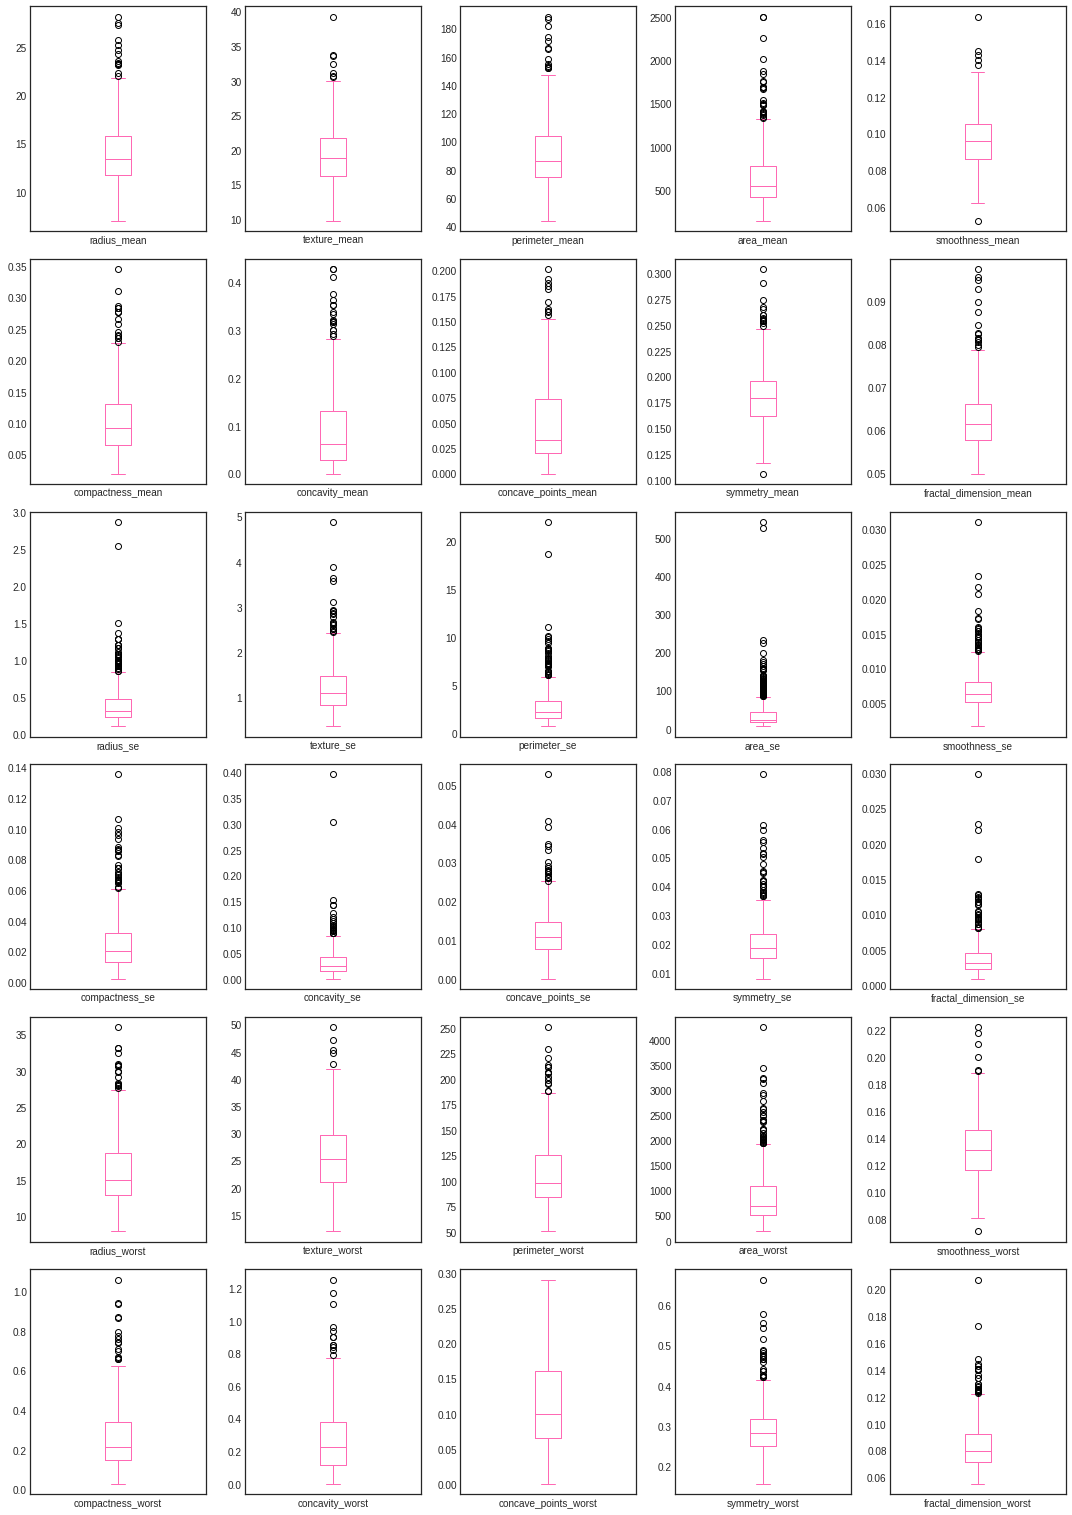

In [11]:
# box and whisker plots
dataset.select_dtypes('float').plot(kind='box', subplots=True, layout=(10,5), figsize=(15,35), 
             sharex=False, sharey=False, fontsize=10, color='hotpink')
plt.tight_layout()
plt.show()

b) Visualize the data-set using histogram plots.

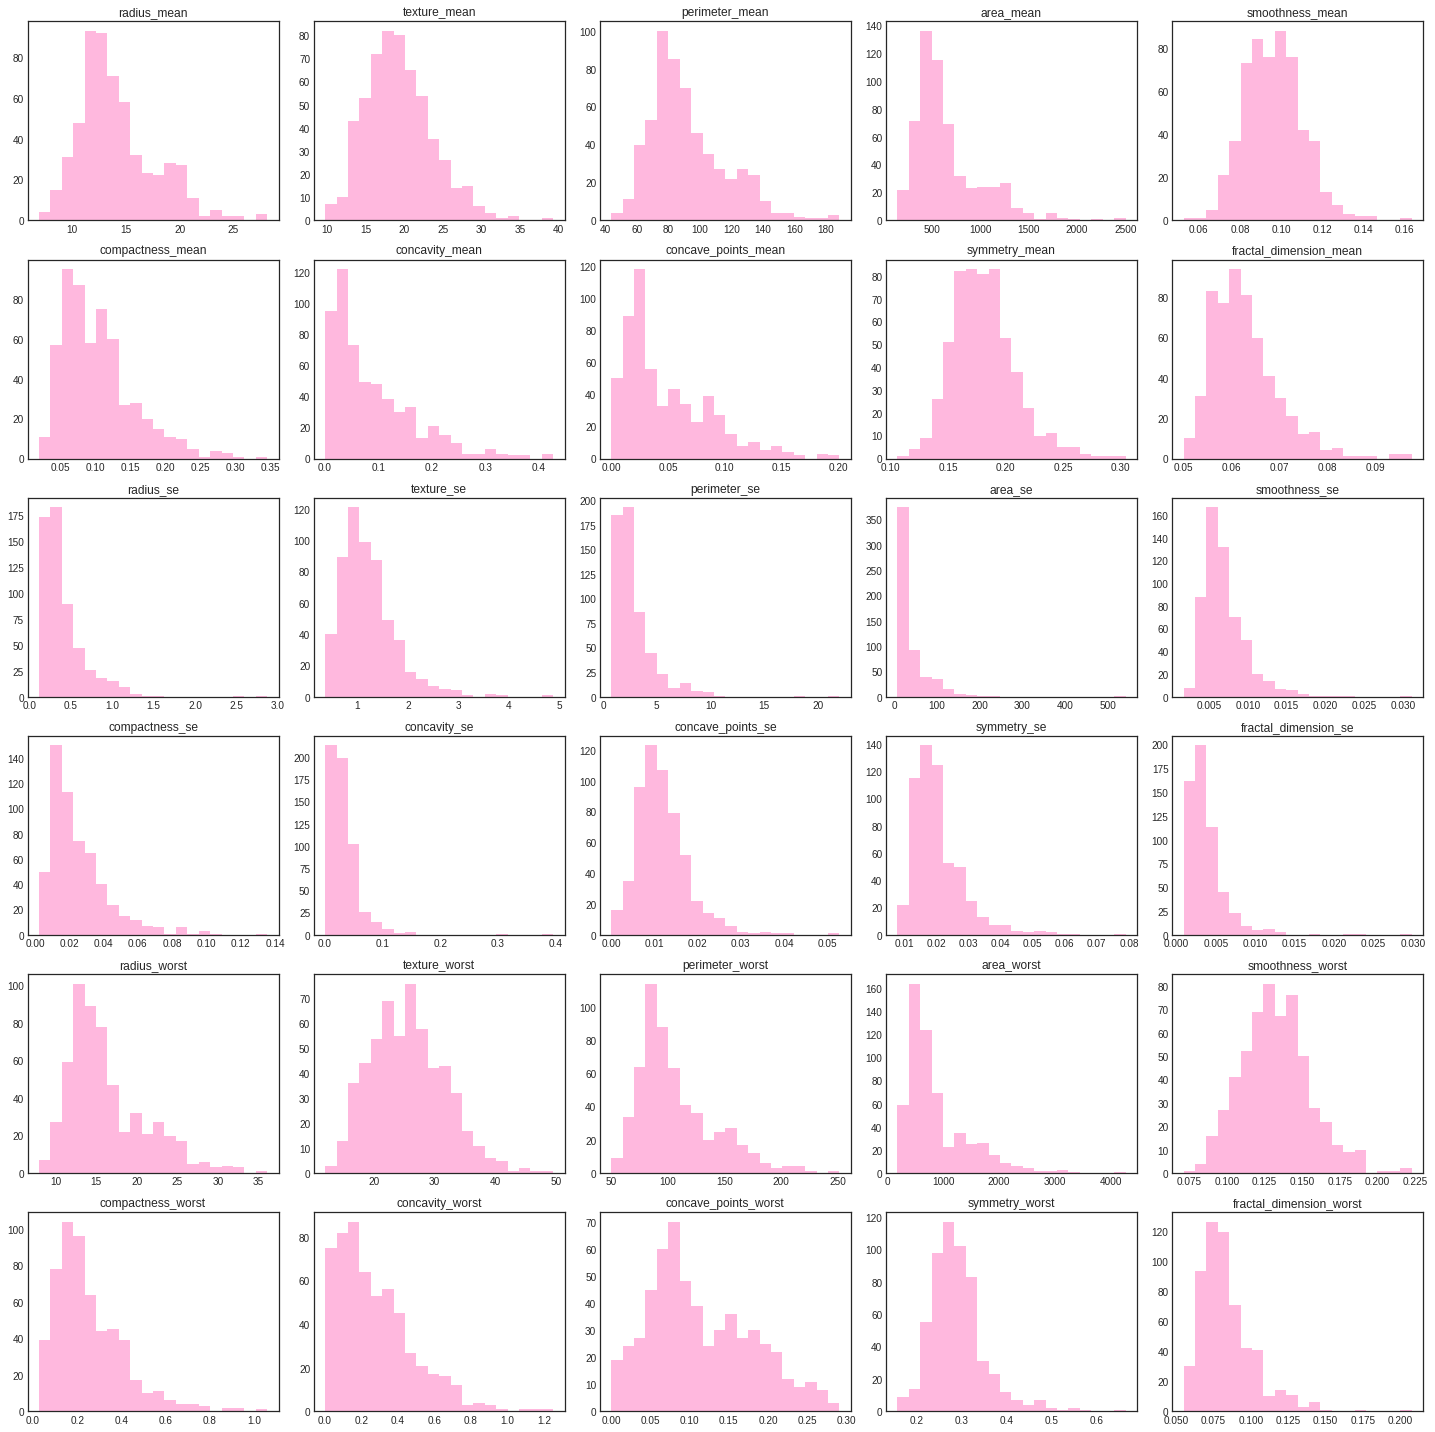

In [12]:
# histograms
dataset.select_dtypes('float').hist(figsize=(20,20), bins=20, grid=False, color='deeppink', alpha=0.3)
plt.tight_layout()
plt.show()

c) Visualize the dataset using scatter plots.

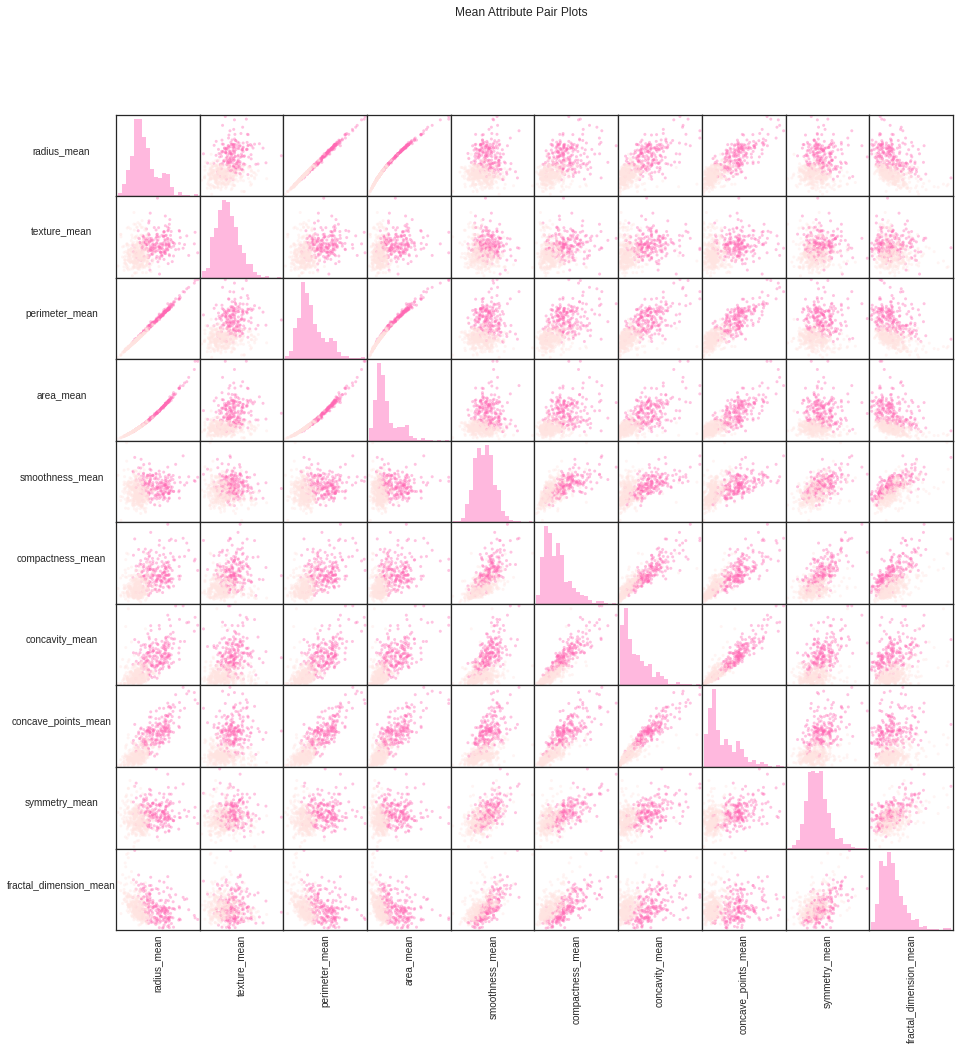

In [13]:
# scatter plot matrix
features = list(dataset.columns[1:11])
color_dic = {0:'mistyrose', 1:'hotpink'}
colors = dataset['diagnosis'].map(lambda x: color_dic.get(x))
sm = scatter_matrix(dataset[features], c=colors, alpha=0.4, figsize=((15,15)),
                    hist_kwds={'color':['deeppink'], 'alpha':0.3, 'bins':20})
plt.suptitle('Mean Attribute Pair Plots')

# Change the label rotation
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# Offset the label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.65,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

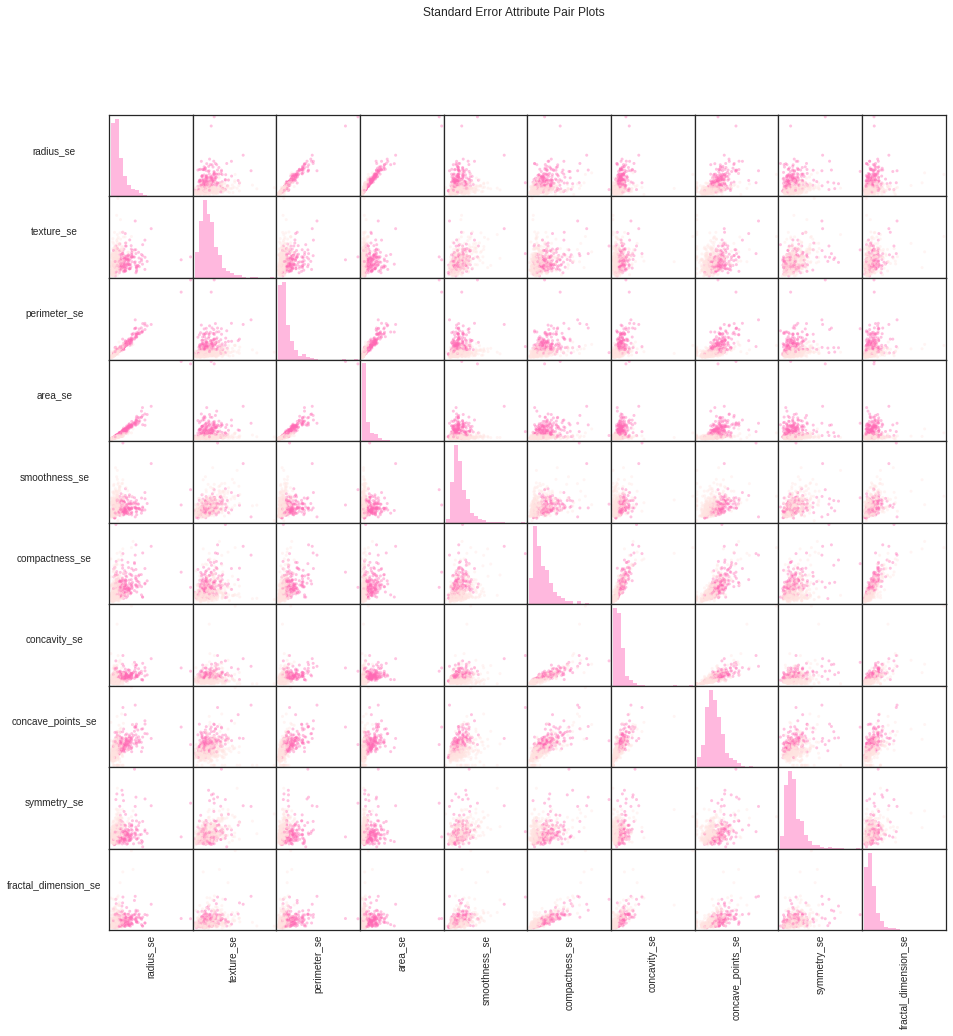

In [14]:
# scatter plot matrix
features = list(dataset.columns[11:21])
color_dic = {0:'mistyrose', 1:'hotpink'}
colors = dataset['diagnosis'].map(lambda x: color_dic.get(x))
sm = scatter_matrix(dataset[features], c=colors, alpha=0.4, figsize=((15,15)),
                    hist_kwds={'color':['deeppink'], 'alpha':0.3, 'bins':20})
plt.suptitle('Standard Error Attribute Pair Plots')

# Change the label rotation
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# Offset the label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.65,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

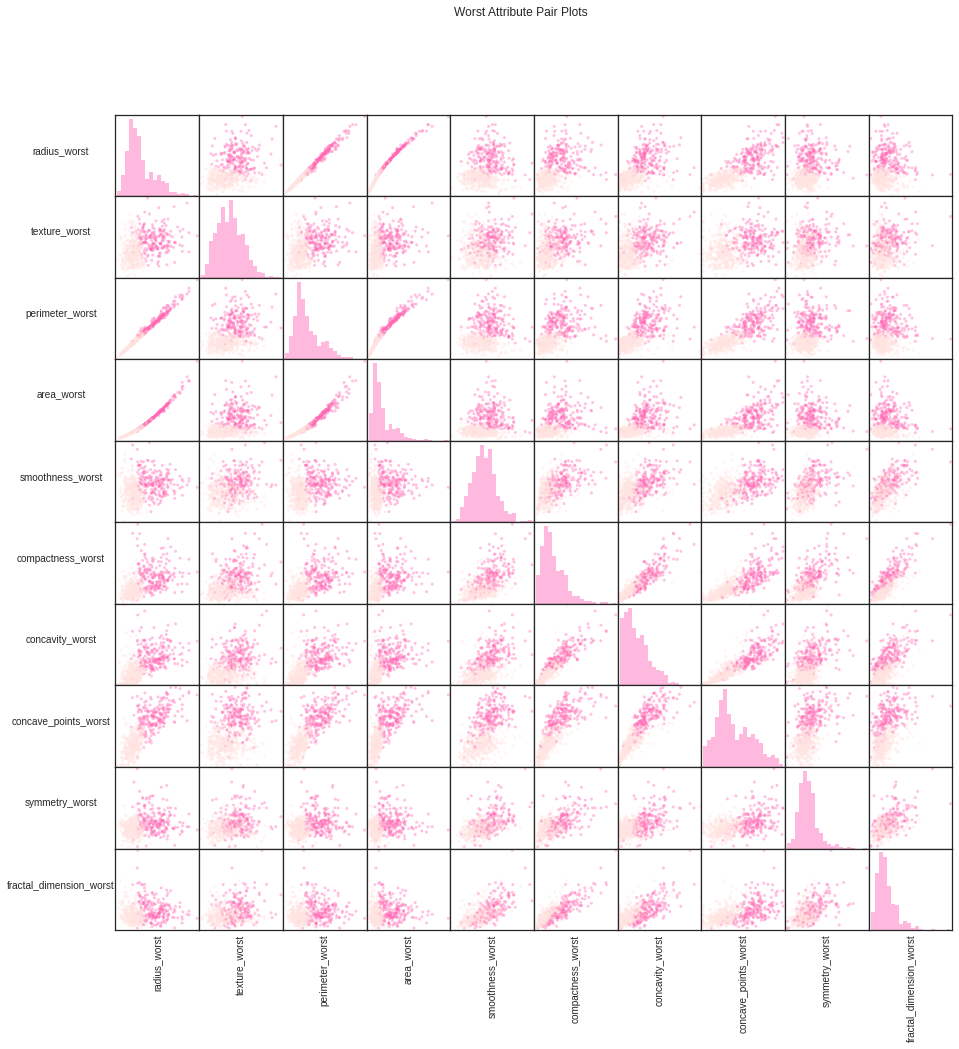

In [15]:
# scatter plot matrix
features = list(dataset.columns[21:])
color_dic = {0:'mistyrose', 1:'hotpink'}
colors = dataset['diagnosis'].map(lambda x: color_dic.get(x))
sm = scatter_matrix(dataset[features], c=colors, alpha=0.4, figsize=((15,15)),
                    hist_kwds={'color':['deeppink'], 'alpha':0.3, 'bins':20})
plt.suptitle('Worst Attribute Pair Plots')

# Change the label rotation
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

# Offset the label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.65,0.5) for s in sm.reshape(-1)]

# Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

# Listing 4
#### Separate out a validation dataset.
**Analysis**</p>
...

a) Create validation set.

In [16]:
array= dataset.values
X = array[:,1:]
Y = array[:,0]
Y=Y.astype('int')
val_size = 0.20
seed = 7
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=val_size, random_state=seed)


b) Build models (Logistic Regression (LR), Linear Discriminant Analysis (LDA), kNearest Neighbors (KNN), Classifications and Regression Trees (CART), Gaussian
Naive Bayes (NB), Support Vector Machines (SVM) and select the best model.

In [17]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=10,random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='f1')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.941260 (0.039059)
LDA: 0.943637 (0.035137)
KNN: 0.917263 (0.057676)
CART: 0.891960 (0.055188)
NB: 0.911963 (0.048049)
SVM: 0.867651 (0.081412)


c) Compare algorithms.

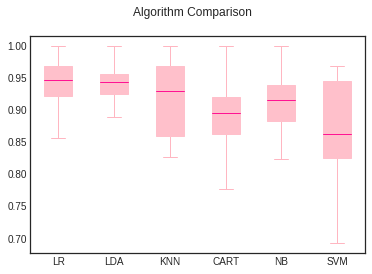

In [18]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
c1 = 'pink'
c2 = 'deeppink'
c3 = 'lightpink'
box = plt.boxplot(results, patch_artist=True, 
                     boxprops=dict(facecolor=c1, color=c1), 
                     capprops=dict(color=c3), 
                     whiskerprops=dict(color=c3), 
                     flierprops=dict(color=c3, markeredgecolor=c3), 
                     medianprops=dict(color=c2))
ax.set_xticklabels(names)
plt.show()

# Listing 5
#### Make predictions on the validation dataset.
**Analysis**</p>
...

In [19]:
# Make predictions on validation dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_val)
print(accuracy_score(Y_val, predictions))
print(confusion_matrix(Y_val, predictions))
print(classification_report(Y_val, predictions))


0.956140350877193
[[74  0]
 [ 5 35]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        74
           1       1.00      0.88      0.93        40

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114

